In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import requests
import os
import seaborn as sns
import duckdb
from scipy import stats

In [3]:
df = pd.read_csv('../dados_limpos/dados.csv')

In [4]:
for col in ["DatGeracaoConjuntoDados","DatVencimentoTitulo","DatIncidenciaMultaMora"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

In [5]:
df.head()

,DatGeracaoConjuntoDados,Codcvnarr,AnmArrecadacao,DatVencimentoTitulo,DatIncidenciaMultaMora,QtdDiasEmAtraso,NumCPFCNPJ,SigNomAgente,DscSituacaoArrecadacao,DscSituacaoCredito,...,VlrTotPvrArr,VlrTotPagArr,VlrTotDifPvrPagArr,VlrSelic,AnoArrec,MesArrec,fatura_paga,fatura_atrasado,fatura_nao_paga,TrimestreVencimento
0,2025-11-12,858158,2005-11,2005-12-15,2005-12-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,3120.38,3120.38,0.0,2.02,2005,11,1,1,0,4
1,2025-11-12,2940945,2020-10,2020-11-16,2020-11-17,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,2549.10,2549.10,0.0,0.51,2020,10,1,1,0,4
2,2025-11-12,858158,2007-01,2007-02-15,2007-02-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1205.08,1205.08,0.0,1.80,2007,1,1,1,0,1
3,2025-11-12,2667718,2014-07,2014-08-25,2014-08-26,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1568.77,1568.77,0.0,1.05,2014,7,1,1,0,3
4,2025-11-12,2667718,2014-12,2015-01-15,2015-01-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1568.77,1568.77,0.0,1.00,2014,12,1,1,0,1


In [6]:
df['DscSituacaoArrecadacao'].value_counts()

DscSituacaoArrecadacao
quitada       405027
pendente        7784
cancelada       2359
restituida        33
Name: count, dtype: int64

In [7]:
dummies_arrec = pd.get_dummies(df['DscSituacaoArrecadacao'], prefix='arrec')
dummies_cred  = pd.get_dummies(df['DscSituacaoCredito'], prefix='cred')

df = pd.concat([df, dummies_arrec, dummies_cred], axis=1)

In [8]:
df["perc_pago"] = df["VlrTotPagArr"] / df["VlrTotPvrArr"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415203 entries, 0 to 415202
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DatGeracaoConjuntoDados  415203 non-null  datetime64[ns]
 1   Codcvnarr                415203 non-null  int64         
 2   AnmArrecadacao           415203 non-null  object        
 3   DatVencimentoTitulo      415203 non-null  datetime64[ns]
 4   DatIncidenciaMultaMora   415203 non-null  datetime64[ns]
 5   QtdDiasEmAtraso          415203 non-null  int64         
 6   NumCPFCNPJ               415203 non-null  int64         
 7   SigNomAgente             415203 non-null  object        
 8   DscSituacaoArrecadacao   415203 non-null  object        
 9   DscSituacaoCredito       415203 non-null  object        
 10  VlrPcpPrvArr             415203 non-null  float64       
 11  VlrTotPvrArr             415203 non-null  float64       
 12  VlrTotPagArr    

In [10]:
df.head()

,DatGeracaoConjuntoDados,Codcvnarr,AnmArrecadacao,DatVencimentoTitulo,DatIncidenciaMultaMora,QtdDiasEmAtraso,NumCPFCNPJ,SigNomAgente,DscSituacaoArrecadacao,DscSituacaoCredito,...,fatura_atrasado,fatura_nao_paga,TrimestreVencimento,arrec_cancelada,arrec_pendente,arrec_quitada,arrec_restituida,cred_pendente,cred_quitada,perc_pago
0,2025-11-12,858158,2005-11,2005-12-15,2005-12-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,4,False,False,True,False,False,True,1.0
1,2025-11-12,2940945,2020-10,2020-11-16,2020-11-17,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,4,False,False,True,False,False,True,1.0
2,2025-11-12,858158,2007-01,2007-02-15,2007-02-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,1,False,False,True,False,False,True,1.0
3,2025-11-12,2667718,2014-07,2014-08-25,2014-08-26,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,3,False,False,True,False,False,True,1.0
4,2025-11-12,2667718,2014-12,2015-01-15,2015-01-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,1,False,False,True,False,False,True,1.0


In [11]:
df.to_parquet("../dados_limpos/dataset_tidy.parquet", index=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415203 entries, 0 to 415202
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DatGeracaoConjuntoDados  415203 non-null  datetime64[ns]
 1   Codcvnarr                415203 non-null  int64         
 2   AnmArrecadacao           415203 non-null  object        
 3   DatVencimentoTitulo      415203 non-null  datetime64[ns]
 4   DatIncidenciaMultaMora   415203 non-null  datetime64[ns]
 5   QtdDiasEmAtraso          415203 non-null  int64         
 6   NumCPFCNPJ               415203 non-null  int64         
 7   SigNomAgente             415203 non-null  object        
 8   DscSituacaoArrecadacao   415203 non-null  object        
 9   DscSituacaoCredito       415203 non-null  object        
 10  VlrPcpPrvArr             415203 non-null  float64       
 11  VlrTotPvrArr             415203 non-null  float64       
 12  VlrTotPagArr    

In [13]:
con = duckdb.connect(database='../dados_limpos/dataset_tidy.parquet', read_only=False)
con.register("df_tidy", df)

### Consulta 1 – Tendência temporal e médias móveis

In [14]:
consulta_1 = """
WITH mensal AS (
    SELECT
        AnoArrec,
        MesArrec,
        AVG(QtdDiasEmAtraso) AS media_atraso,
        AVG(perc_pago) AS media_perc_pago,
        COUNT(*) AS total_faturas
    FROM df_tidy
    GROUP BY AnoArrec, MesArrec
)
SELECT
    *,
    AVG(media_atraso) OVER (
        ORDER BY AnoArrec, MesArrec
        ROWS BETWEEN 2 PRECEDING AND 2 FOLLOWING
    ) AS atraso_media_movel,
    AVG(media_perc_pago) OVER (
        ORDER BY AnoArrec, MesArrec
        ROWS BETWEEN 2 PRECEDING AND 2 FOLLOWING
    ) AS pagamento_media_movel
FROM mensal
ORDER BY AnoArrec, MesArrec;

"""

In [15]:
resultado_1 = con.sql(consulta_1).df()
resultado_1

,AnoArrec,MesArrec,media_atraso,media_perc_pago,total_faturas,atraso_media_movel,pagamento_media_movel
0,2005,1,51.153409,0.926301,528,77.412772,0.955237
1,2005,2,97.882353,0.970436,561,76.092110,0.959691
2,2005,3,83.202555,0.968972,548,74.535281,0.962370
3,2005,4,72.130125,0.973055,561,77.061867,0.971470
4,2005,5,68.307965,0.973086,565,76.554044,0.965129
...,...,...,...,...,...,...,...
245,2025,6,26.512302,0.973898,3414,25.011398,0.975889
246,2025,7,28.879942,0.972545,3440,29.158151,0.971609
247,2025,8,28.400992,0.972000,3429,218.572951,0.781950
248,2025,9,35.310586,0.965069,3429,266.588113,0.733964


### Consulta 2 – Correlação e variabilidade

In [16]:
consulta_2 = """ 
SELECT
    corr(QtdDiasEmAtraso, perc_pago) AS correlacao_atraso_pagamento,
    covar_pop(QtdDiasEmAtraso, perc_pago) AS covariancia,
    var_pop(QtdDiasEmAtraso) AS variancia_atraso,
    var_pop(perc_pago) AS variancia_pagamento
FROM df_tidy;

"""

In [17]:
resultado_2 = con.sql(consulta_2).df()
resultado_2

,correlacao_atraso_pagamento,covariancia,variancia_atraso,variancia_pagamento
0,-0.943108,-22.435128,24889.644237,0.022964


### Consulta 3 – Análise por quintis de valor previsto

In [18]:
consulta_3 = """
WITH faixa_valor AS (
    SELECT
        *,
        NTILE(5) OVER (ORDER BY VlrTotPvrArr) AS quintil_valor
    FROM df_tidy
)
SELECT
    quintil_valor,
    AVG(CASE WHEN fatura_nao_paga = 1 THEN 1 ELSE 0 END) AS prob_inadimplencia,
    AVG(VlrTotPvrArr) AS valor_medio_previsto,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY VlrTotPvrArr) AS mediana_valor_previsto,
    COUNT(*) AS total_faturas,
    COUNT(*) * 100.0 / (SELECT COUNT(*) FROM df_tidy) AS percentual_do_total
FROM faixa_valor
GROUP BY quintil_valor
ORDER BY quintil_valor;

"""

In [19]:
resultado_3 = con.sql(consulta_3).df()
resultado_3

,quintil_valor,prob_inadimplencia,valor_medio_previsto,mediana_valor_previsto,total_faturas,percentual_do_total
0,1,0.030635,804.286599,756.17,83041,20.000096
1,2,0.037054,3062.034227,3000.96,83041,20.000096
2,3,0.011934,6379.401867,6391.45,83041,20.000096
3,4,0.021688,10924.239586,10348.13,83040,19.999855
4,5,0.015511,140776.801476,38875.79,83040,19.999855


### Consulta 4 – Ranking e suavização de atraso médio

In [20]:
consutla_4 = """
WITH base AS (
    SELECT
        *,
        NTILE(5) OVER (ORDER BY VlrTotPvrArr) AS faixa_valor
    FROM df_tidy
),
agregado AS (
    SELECT
        faixa_valor,
        AVG(QtdDiasEmAtraso) AS atraso_medio,
        COUNT(*) AS total
    FROM base
    GROUP BY faixa_valor
)
SELECT
    *,
    AVG(atraso_medio) OVER (
        ORDER BY faixa_valor
        ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING
    ) AS atraso_suavizado,
    RANK() OVER (ORDER BY atraso_medio DESC) AS ranking_atraso
FROM agregado
ORDER BY faixa_valor;



"""

In [21]:
resultado_4 = con.sql(consutla_4).df()
resultado_4

,faixa_valor,atraso_medio,total,atraso_suavizado,ranking_atraso
0,1,40.935803,83041,43.142014,2
1,2,45.348226,83041,33.649595,1
2,3,14.664756,83041,28.242654,5
3,4,24.714981,83040,19.167158,3
4,5,18.121737,83040,21.418359,4


### Consulta 5 – Análise sazonal e variação trimestral

In [22]:
consulta_5 = """ 
WITH trimestral AS (
    SELECT
        AnoArrec,
        TrimestreVencimento,
        AVG(QtdDiasEmAtraso) AS atraso_medio_trimestre,
        AVG(perc_pago) AS perc_medio_pago
    FROM df_tidy
    GROUP BY AnoArrec, TrimestreVencimento
), janelas AS (
    SELECT
        *,
        LAG(atraso_medio_trimestre) OVER (ORDER BY AnoArrec, TrimestreVencimento) AS atraso_prev,
        LAG(perc_medio_pago) OVER (ORDER BY AnoArrec, TrimestreVencimento) AS perc_prev,
        AVG(atraso_medio_trimestre) OVER (
            ORDER BY AnoArrec, TrimestreVencimento
            ROWS BETWEEN 2 PRECEDING AND 2 FOLLOWING
        ) AS atraso_suavizado,
        AVG(perc_medio_pago) OVER (
            ORDER BY AnoArrec, TrimestreVencimento
            ROWS BETWEEN 2 PRECEDING AND 2 FOLLOWING
        ) AS pagamento_suavizado
    FROM trimestral
)
SELECT
    *,
    (atraso_medio_trimestre - atraso_prev) / NULLIF(atraso_prev,0) AS variacao_percentual_atraso,
    (perc_medio_pago - perc_prev) / NULLIF(perc_prev,0) AS variacao_percentual_pagamento
FROM janelas
ORDER BY AnoArrec, TrimestreVencimento;


"""

In [23]:
resultado_5 = con.sql(consulta_5).df()
resultado_5

,AnoArrec,TrimestreVencimento,atraso_medio_trimestre,perc_medio_pago,atraso_prev,perc_prev,atraso_suavizado,pagamento_suavizado,variacao_percentual_atraso,variacao_percentual_pagamento
0,2005,1,74.019608,0.956261,NaN,NaN,74.623592,0.961240,NaN,NaN
1,2005,2,74.269576,0.971712,74.019608,0.956261,69.726948,0.963242,0.003377,0.016157
2,2005,3,75.581592,0.955746,74.269576,0.971712,69.043356,0.961566,0.017666,-0.016431
3,2005,4,55.037016,0.969249,75.581592,0.955746,67.248470,0.961227,-0.271820,0.014129
4,2006,1,66.308989,0.954864,55.037016,0.969249,66.230269,0.956005,0.204807,-0.014842
...,...,...,...,...,...,...,...,...,...,...
79,2024,4,14.784273,0.987211,13.306068,0.988772,15.479692,0.986607,0.111093,-0.001579
80,2025,1,18.015265,0.985090,14.784273,0.987211,18.572975,0.983328,0.218543,-0.002148
81,2025,2,18.825106,0.982757,18.015265,0.985090,116.832595,0.884691,0.044953,-0.002368
82,2025,3,27.934163,0.972813,18.825106,0.982757,142.344676,0.859061,0.483878,-0.010119


# Análise Exploratória e Teste de Hipóteses

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415203 entries, 0 to 415202
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DatGeracaoConjuntoDados  415203 non-null  datetime64[ns]
 1   Codcvnarr                415203 non-null  int64         
 2   AnmArrecadacao           415203 non-null  object        
 3   DatVencimentoTitulo      415203 non-null  datetime64[ns]
 4   DatIncidenciaMultaMora   415203 non-null  datetime64[ns]
 5   QtdDiasEmAtraso          415203 non-null  int64         
 6   NumCPFCNPJ               415203 non-null  int64         
 7   SigNomAgente             415203 non-null  object        
 8   DscSituacaoArrecadacao   415203 non-null  object        
 9   DscSituacaoCredito       415203 non-null  object        
 10  VlrPcpPrvArr             415203 non-null  float64       
 11  VlrTotPvrArr             415203 non-null  float64       
 12  VlrTotPagArr    

## Análise univariada

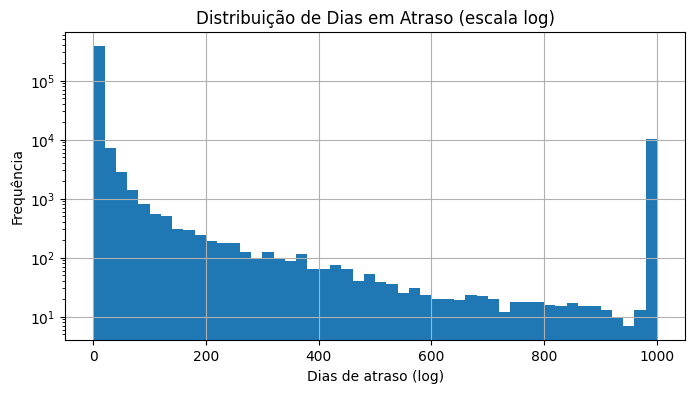

In [25]:
plt.figure(figsize=(8,4))
df['QtdDiasEmAtraso'].dropna().hist(bins=50)
plt.yscale('log')
plt.title("Distribuição de Dias em Atraso (escala log)")
plt.xlabel("Dias de atraso (log)")
plt.ylabel("Frequência")
plt.show()

## Análise bivariada

In [26]:
df[['QtdDiasEmAtraso','perc_pago']].corr(method='spearman')


,QtdDiasEmAtraso,perc_pago
QtdDiasEmAtraso,1.000000,-0.293247
perc_pago,-0.293247,1.000000


## Análise multivariada

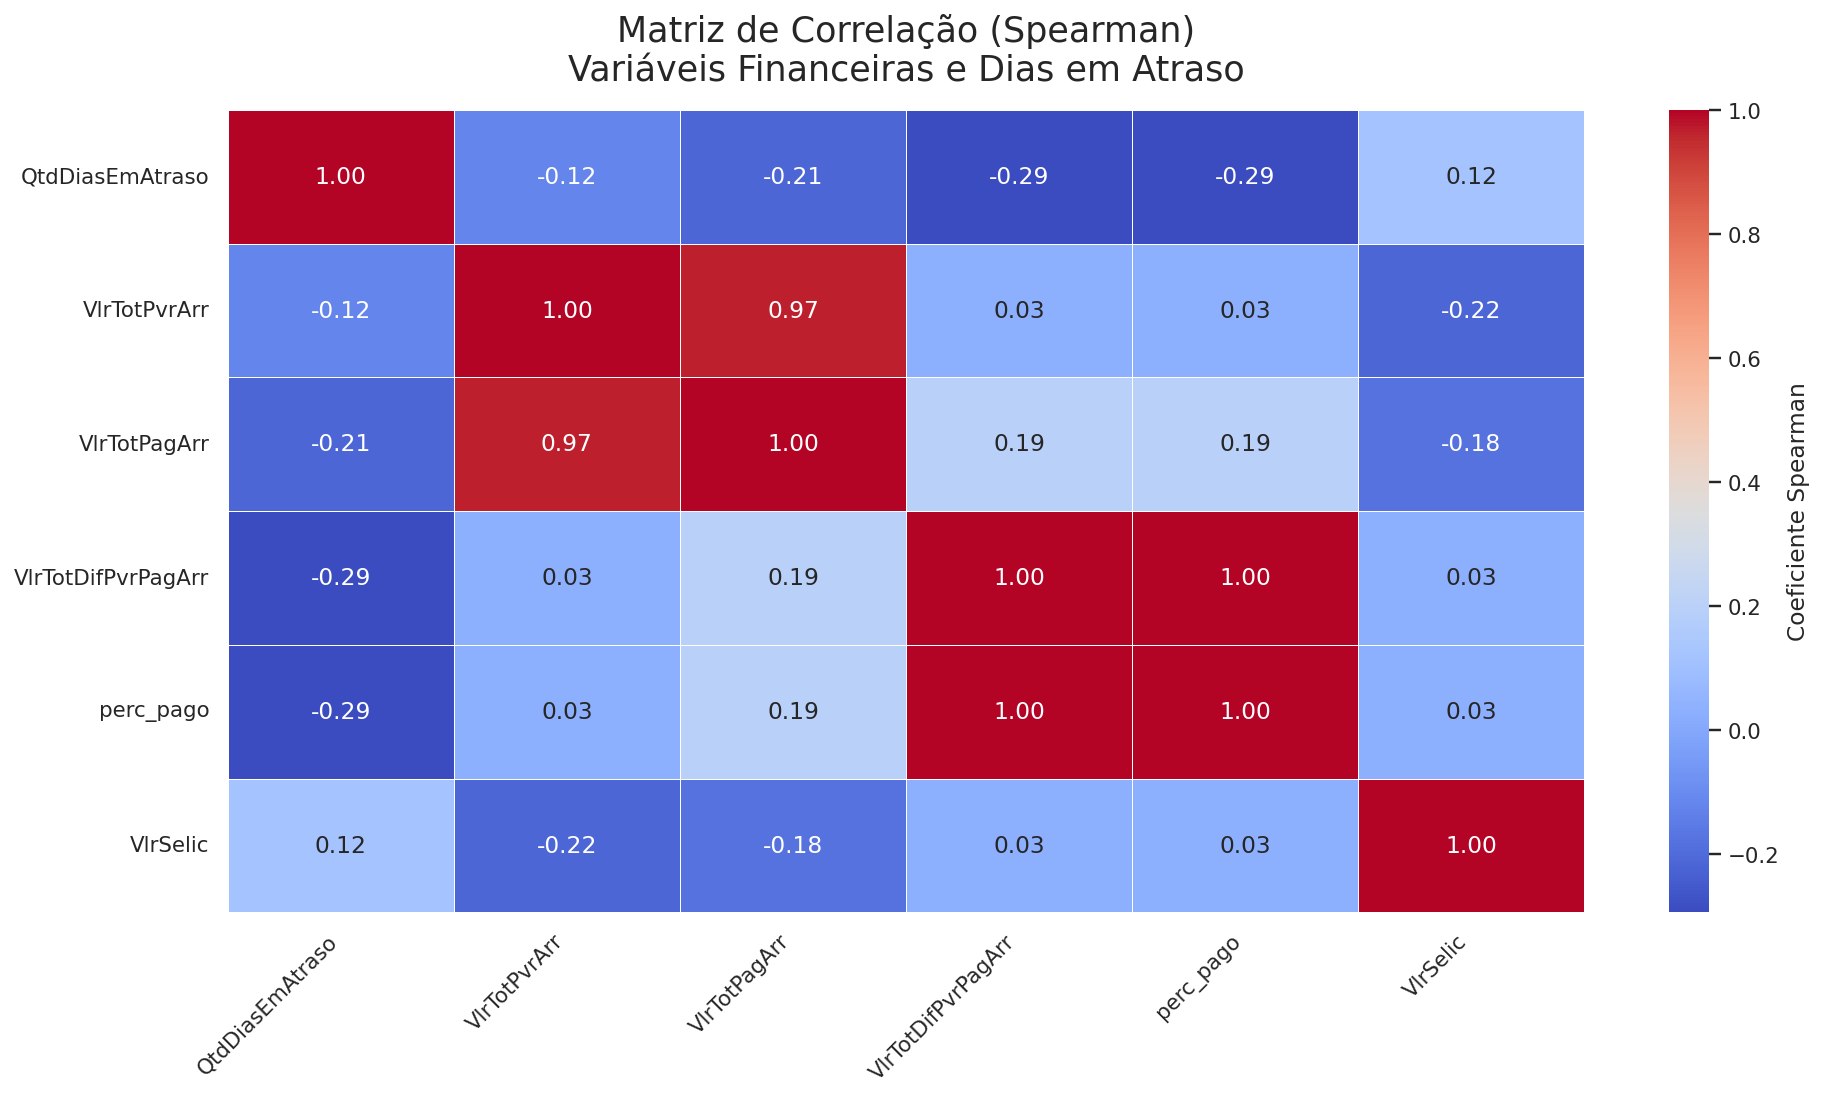

In [27]:
sns.set_theme(style="whitegrid", palette="colorblind")

cols = [
    'QtdDiasEmAtraso','VlrTotPvrArr','VlrTotPagArr',
    'VlrTotDifPvrPagArr','perc_pago','VlrSelic'
]
corr = df[cols].corr(method='spearman')
plt.figure(figsize=(14, 8), dpi=140)
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Coeficiente Spearman"}
)
plt.title(
    "Matriz de Correlação (Spearman)\nVariáveis Financeiras e Dias em Atraso",
    fontsize=18,
    pad=15
)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

## Teste de hipóteses

H1 — Relação entre atraso e proporção de pagamento:
Existe uma associação negativa entre o número de dias em atraso e a proporção do valor efetivamente pago. Em outras palavras, quanto maior o atraso no pagamento, menor tende a ser o percentual liquidado pelo contribuinte.

$h_0$: Não existe associação entre o número de dias em atraso e a proporção de pagamento.

$h_1$: Existe uma associação negativa entre o número de dias em atraso e a proporção de pagamento.

In [38]:
h1_data = df[['QtdDiasEmAtraso','perc_pago']].dropna()
rho, p = stats.spearmanr(h1_data['QtdDiasEmAtraso'], h1_data['perc_pago'])
rho, p
print(f"Coeficiente de Spearman (p): {rho:.4f}")
print(f"Valor-p: {p:.4e}")

if p < 0.05:
    print("A correlação é estatisticamente significativa (p < 0.05).")
    if rho < 0:
        print("Relação NEGATIVA: quanto maior o atraso, menor o percentual pago.")
    elif rho > 0:
        print("Relação POSITIVA: quanto maior o atraso, maior o percentual pago (incomum).")
    else:
        print("Sem correlação detectável (p ≈ 0).")
else:
    print("A correlação não é estatisticamente significativa (p ≥ 0.05).")

Coeficiente de Spearman (p): -0.2932
Valor-p: 0.0000e+00
A correlação é estatisticamente significativa (p < 0.05).
Relação NEGATIVA: quanto maior o atraso, menor o percentual pago.


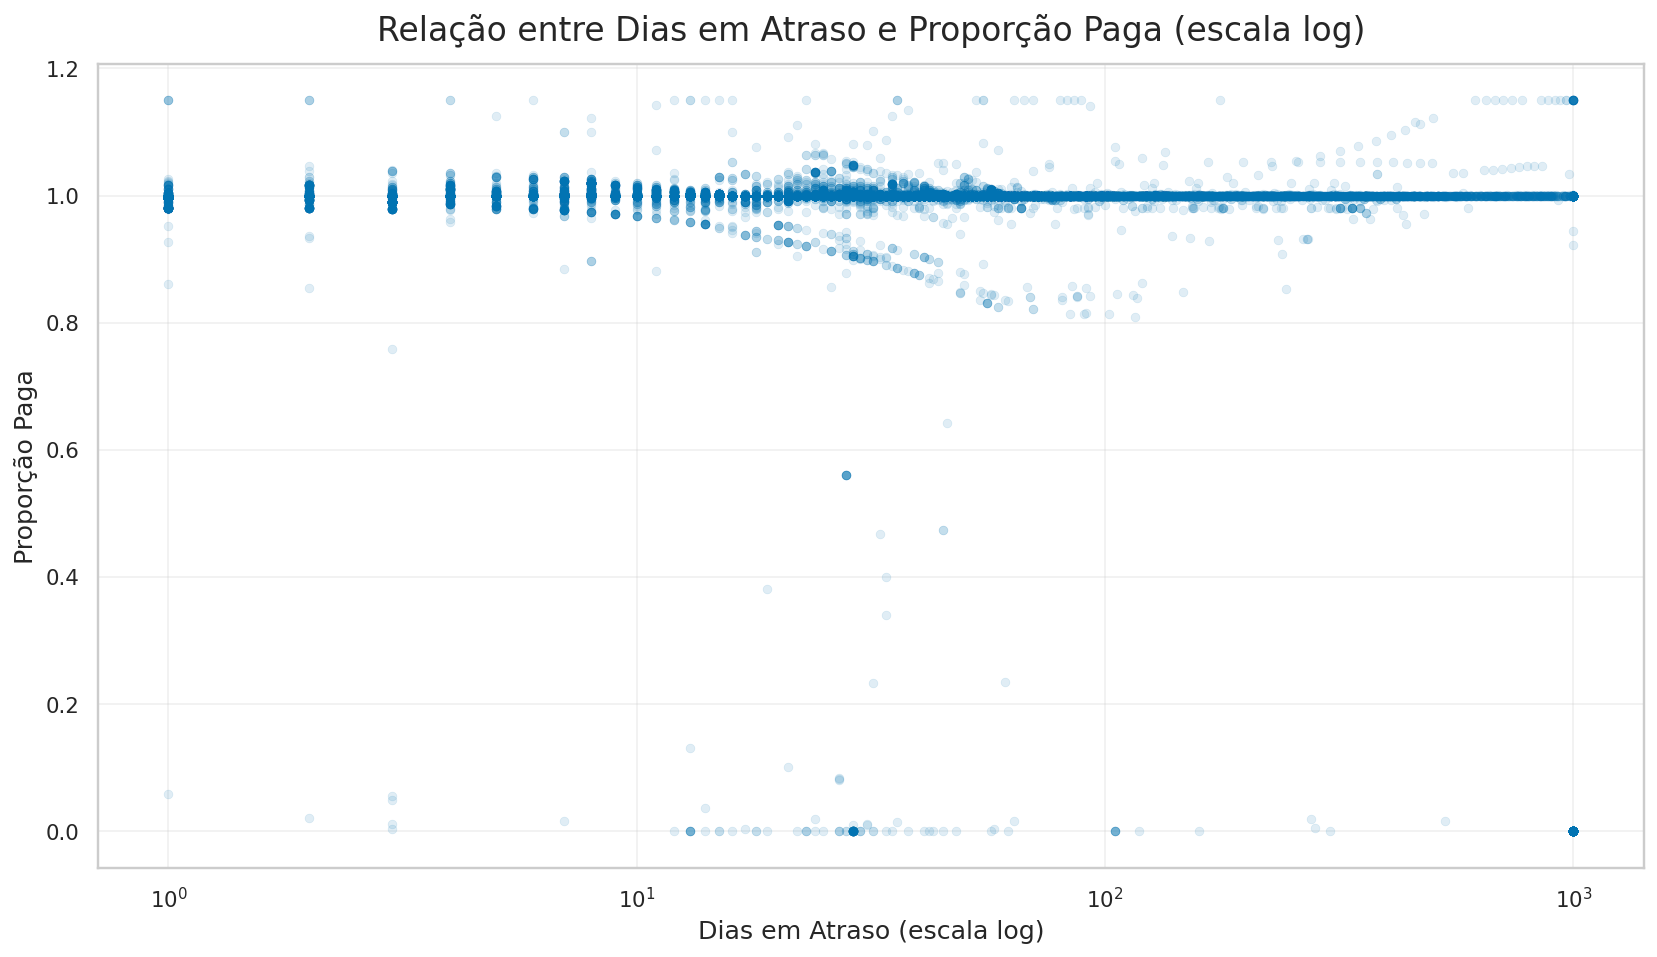

In [29]:
sns.set_theme(style="whitegrid", palette="colorblind")

plt.figure(figsize=(12, 7), dpi=140)

sns.scatterplot(
    data=h1_data,
    x='QtdDiasEmAtraso',
    y='perc_pago',
    s=20,
    alpha=0.12,
    edgecolor=None
)

plt.xscale('log')

plt.title(
    "Relação entre Dias em Atraso e Proporção Paga (escala log)",
    fontsize=17,
    pad=12
)

plt.xlabel("Dias em Atraso (escala log)", fontsize=13)
plt.ylabel("Proporção Paga", fontsize=13)

plt.grid(alpha=0.25)

plt.tight_layout()
plt.show()


H2 — Relação entre valor previsto e inadimplência total:
Créditos com valores previstos mais elevados apresentam maior probabilidade de resultar em inadimplência total, isto é, de não receberem nenhum pagamento.

$h_0$: Não há diferença entre as distribuições dos valores previstos (VlrTotPvrArr) de faturas pagas e não pagas.

$h_1$: O valor previsto é menor para as faturas pagas do que para as não pagas.

In [31]:
df['inadim_total'] = (df['VlrTotPagArr'] == 0).astype(int)

In [40]:

pago = df[df['fatura_paga']==1]['VlrTotPvrArr']
nao_pago = df[df['fatura_nao_paga']==1]['VlrTotPvrArr']

resultado = stats.mannwhitneyu(pago, nao_pago, alternative='less')
alpha = 0.05

print(f" Teste de Mann-Whitney U - Comparação entre faturas pagas e não pagas")
print(f"U estatístico = {resultado.statistic:.2f}")
print(f"Valor-p = {resultado.pvalue:.4e}")

if resultado.pvalue < alpha:
    print("\nResultado: Rejeita-se H₀ (p < 0.05)")
    print(" Conclusão: Valores previstos das faturas *pagas* são estatisticamente **menores** que os das faturas *não pagas*.")
    print(" Interpretação: Faturas com valores mais altos apresentam maior probabilidade de inadimplência total.")
else:
    print("\nResultado: Não se rejeita H₀ (p ≥ 0.05)")
    print("Conclusão: Não há evidência estatística de diferença significativa entre os valores previstos de faturas pagas e não pagas.")


 Teste de Mann-Whitney U - Comparação entre faturas pagas e não pagas
U estatístico = 2325741274.50
Valor-p = 1.0000e+00

Resultado: Não se rejeita H₀ (p ≥ 0.05)
Conclusão: Não há evidência estatística de diferença significativa entre os valores previstos de faturas pagas e não pagas.


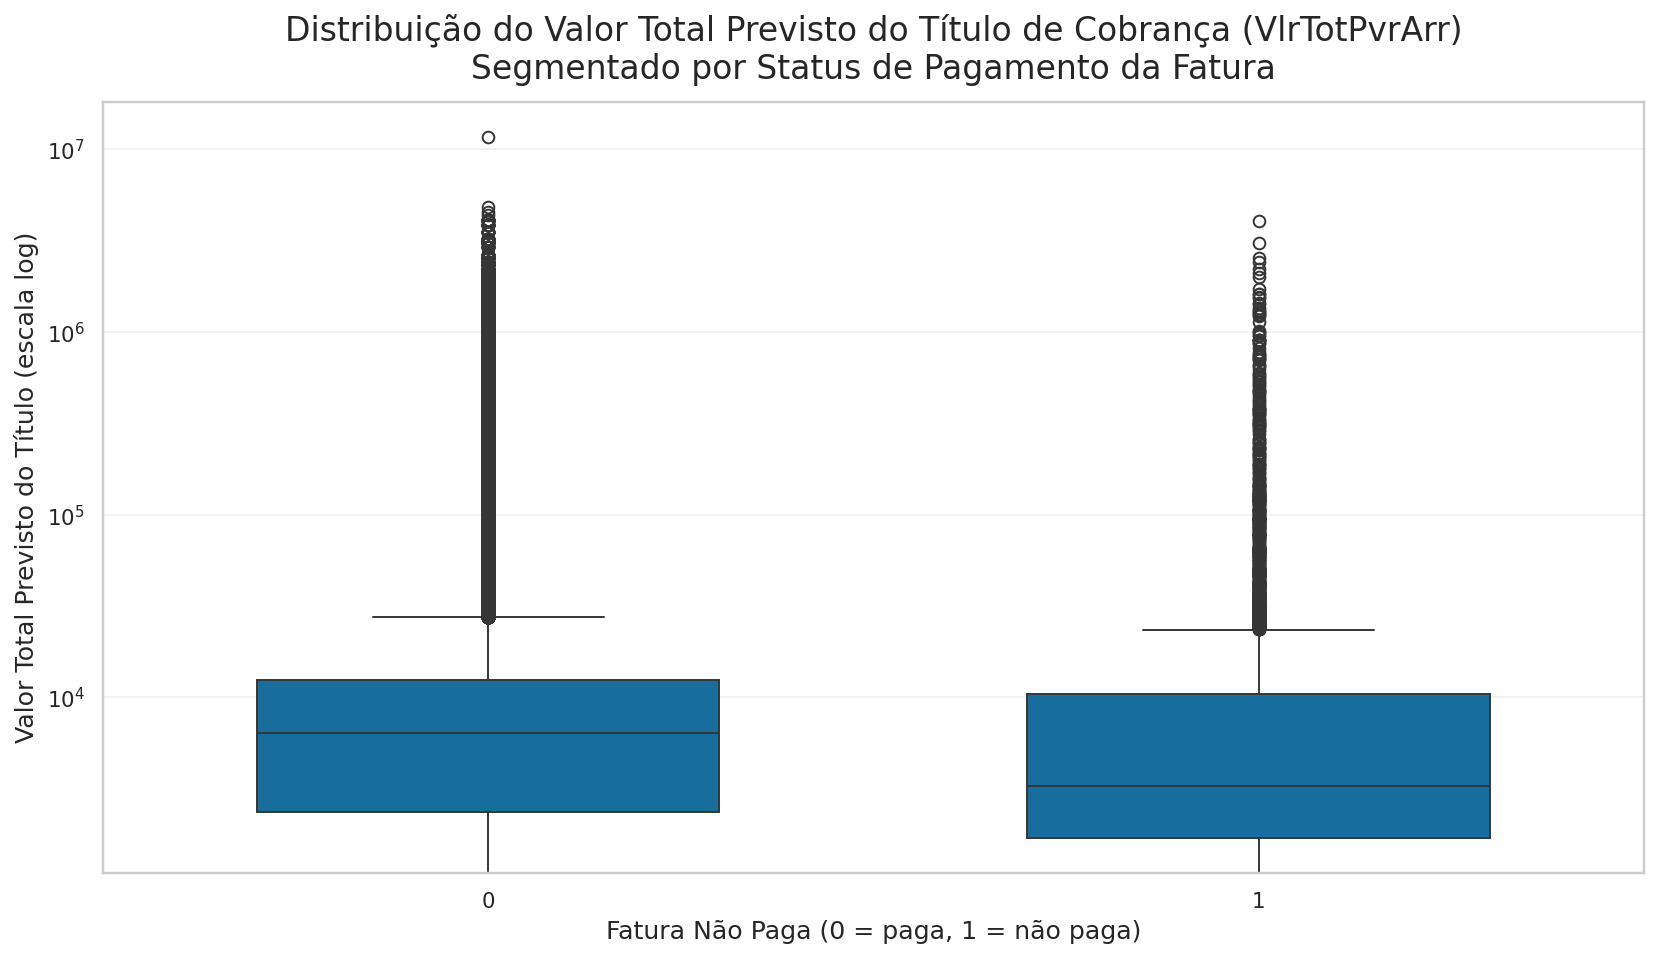

In [33]:

sns.set_theme(style="whitegrid", palette="colorblind")

plt.figure(figsize=(12, 7), dpi=140)

sns.boxplot(
    data=df,
    x='fatura_nao_paga',
    y='VlrTotPvrArr',
    width=0.6
)

plt.yscale('log')

plt.title(
    "Distribuição do Valor Total Previsto do Título de Cobrança (VlrTotPvrArr)\n"
    "Segmentado por Status de Pagamento da Fatura",
    fontsize=17,
    pad=12
)

plt.xlabel("Fatura Não Paga (0 = paga, 1 = não paga)", fontsize=13)
plt.ylabel("Valor Total Previsto do Título (escala log)", fontsize=13)

plt.grid(axis='y', alpha=0.25)

plt.tight_layout()
plt.show()


H3 — Influência do valor previsto sobre o atraso:
O valor total previsto para arrecadação exerce influência sobre o número de dias em atraso, indicando que montantes maiores podem estar associados a atrasos mais longos (ou mais curtos).

$h_0$: Não existe associação entre o valor total previsto (VlrTotPvrArr) e o número de dias em atraso (QtdDiasEmAtraso).

$h_1$: Existe uma associação significativa entre o valor total previsto e o número de dias em atraso (sem direção pré-definida).

In [42]:
h3 = df[['VlrTotPvrArr','QtdDiasEmAtraso']].dropna()
rho, p = stats.spearmanr(h3['VlrTotPvrArr'], h3['QtdDiasEmAtraso'])
rho, p

if p < 0.05:
    print("\nResultado: Rejeita-se H0 (p < 0.05)")
    print("Conclusão: Existe uma correlação estatisticamente significativa entre o valor previsto e o atraso.")
    
    if rho > 0:
        print("Interpretação: Valores previstos mais altos estão associados a MAIOR número de dias em atraso.")
    elif rho < 0:
        print("Interpretação: Valores previstos mais altos estão associados a MENOR número de dias em atraso.")
    else:
        print("Interpretação: Correlação nula, mas estatisticamente significativa (caso raro).")
else:
    print("\nResultado: Não se rejeita H0 (p >= 0.05)")
    print("Conclusão: Não há evidência estatística de associação entre o valor previsto e o atraso.")


Resultado: Rejeita-se H0 (p < 0.05)
Conclusão: Existe uma correlação estatisticamente significativa entre o valor previsto e o atraso.
Interpretação: Valores previstos mais altos estão associados a MENOR número de dias em atraso.


In [35]:
h3['quartil_valor'] = pd.qcut(h3['VlrTotPvrArr'], q=4, labels=['1º Quartil', '2º Quartil', '3º Quartil', '4º Quartil'])


/tmp/ipykernel_24306/1946832139.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_quartil = h3.groupby('quartil_valor')['QtdDiasEmAtraso'].mean()


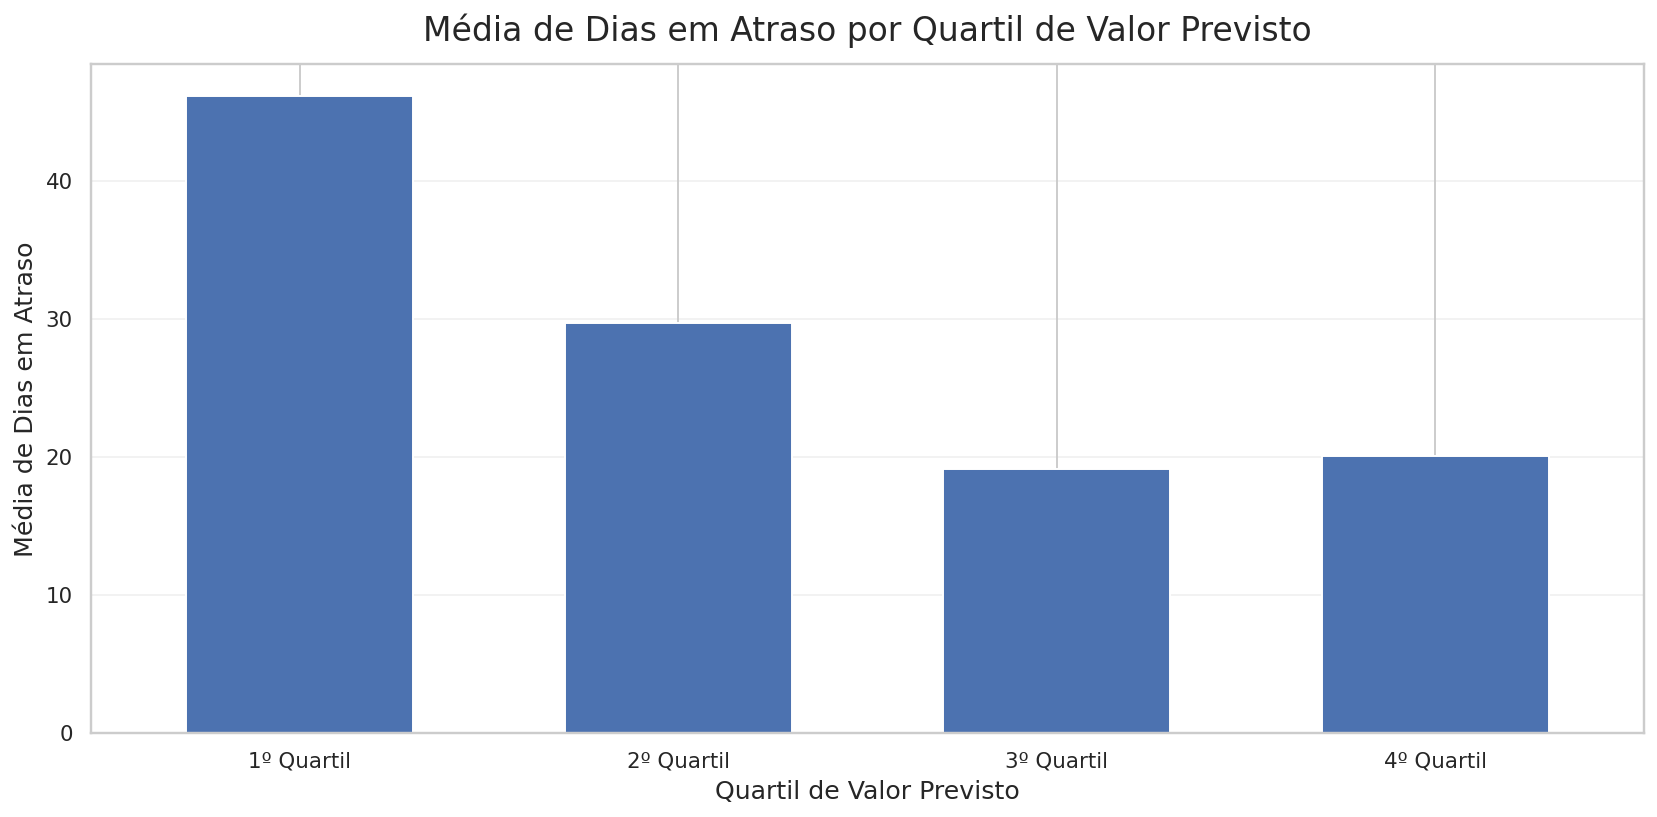

In [36]:

sns.set_theme(style="whitegrid", palette="colorblind")

mean_by_quartil = h3.groupby('quartil_valor')['QtdDiasEmAtraso'].mean()

plt.figure(figsize=(12, 6), dpi=140)

mean_by_quartil.plot(
    kind='bar',
    color=sns.color_palette("deep")[0],
    width=0.6
)

plt.title(
    "Média de Dias em Atraso por Quartil de Valor Previsto",
    fontsize=17,
    pad=12
)
plt.xlabel("Quartil de Valor Previsto", fontsize=13)
plt.ylabel("Média de Dias em Atraso", fontsize=13)

plt.xticks(rotation=0, fontsize=11)
plt.grid(axis='y', alpha=0.25)

plt.tight_layout()
plt.show()